In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv('T1.csv')

In [ ]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

#extracting hour and month from Date/Time column and add the dataframe

df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.date
df['Month'] = df['Date/Time'].dt.month_name()

In [ ]:
df.rename(columns = {
    'LV ActivePower (kW)':'Active_power',
    'Wind Speed (m/s)': 'Wind_speed',
    'Wind Direction (°)':'Wind_direction',
    'Theoretical_Power_Curve (KWh)':'T_power_curve'
}, inplace = True)

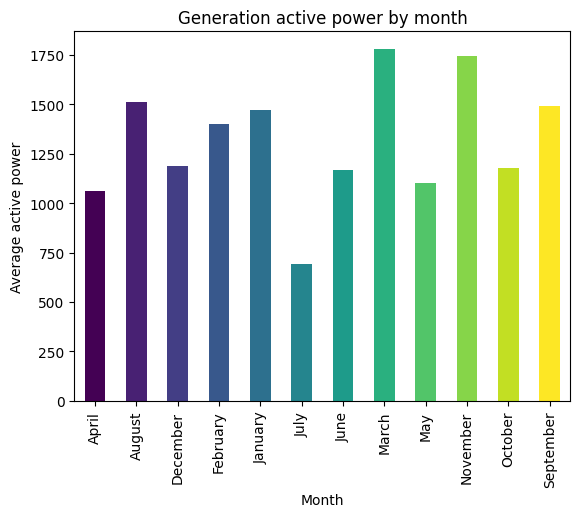

In [ ]:
#generation active power by month

power_by_month = df.groupby('Month')['Active_power'].mean()
colors = plt.cm.viridis(np.linspace(0, 1, len(power_by_month)))
power_by_month.plot(kind = 'bar', color = colors )
plt.title('Generation active power by month')
plt.xlabel('Month')
plt.ylabel('Average active power')
plt.show()

we can see from the above graph in August, March, and November, the average power production is higher.



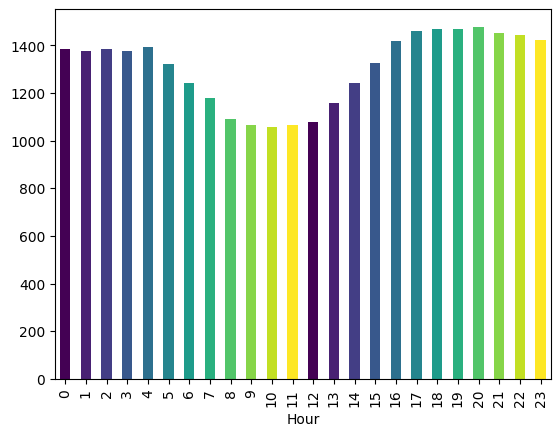

In [ ]:
#active power generation by hour
power_by_hour = df.groupby('Hour')['Active_power'].mean()
colors = plt.cm.viridis(np.linspace(0, 1, len(power_by_month)))
power_by_hour.plot(kind = 'bar', color = colors)
plt.show()

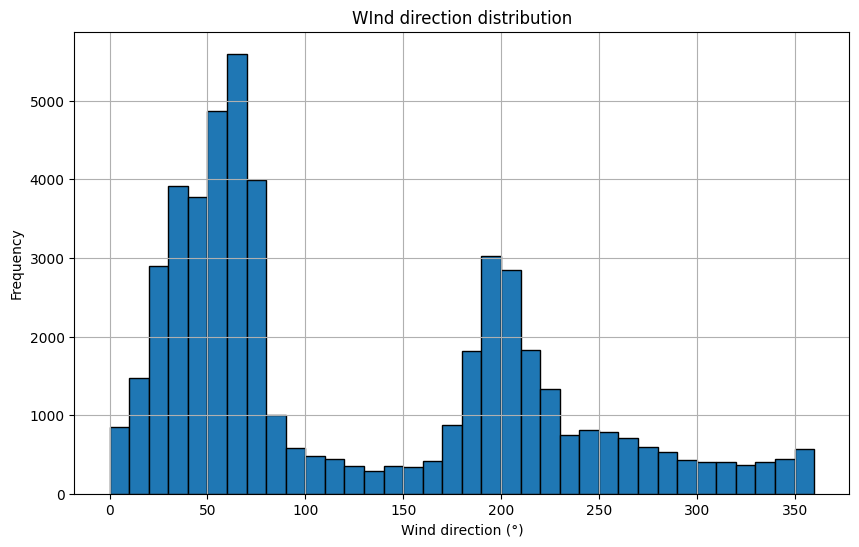

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Wind_direction'], bins = 36, edgecolor = 'black')


plt.title('WInd direction distribution')
plt.xlabel('Wind direction (°)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Or, we can create wind rose diagram to be more visual

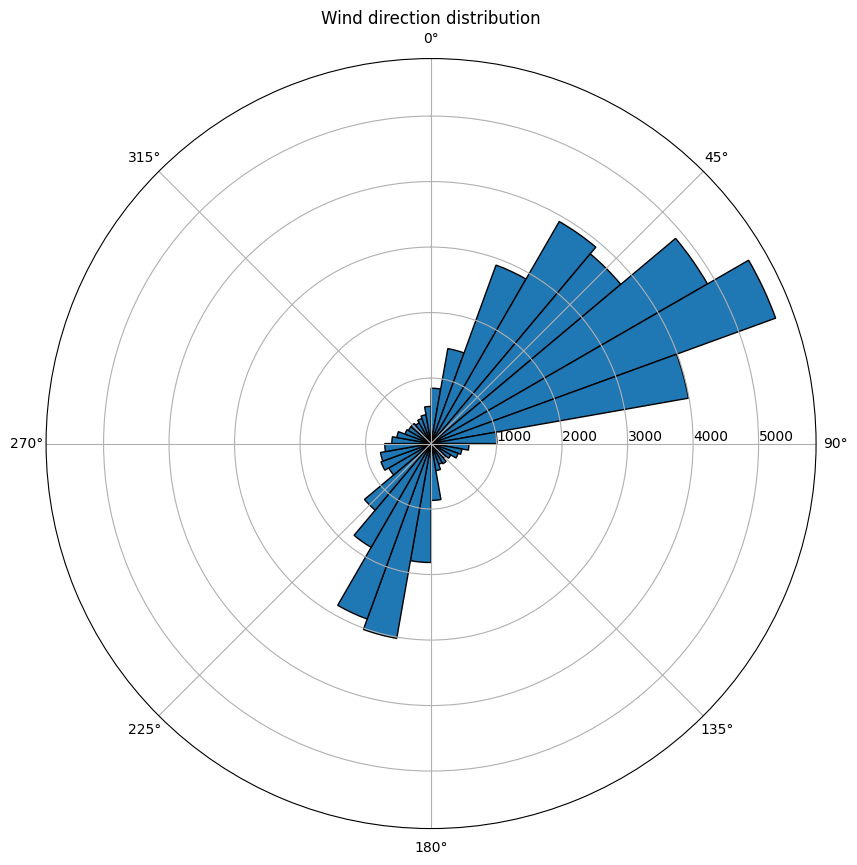

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar = True)
theta = np.radians(df['Wind_direction'])

ax.hist(theta, bins = 36, edgecolor = 'black')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_rlabel_position(90)
ax.set_title('Wind direction distribution')

plt.show()

So, it is clear that The wind distribution is prominently high in the directions of **0-90 degrees and 180-225 degrees.**

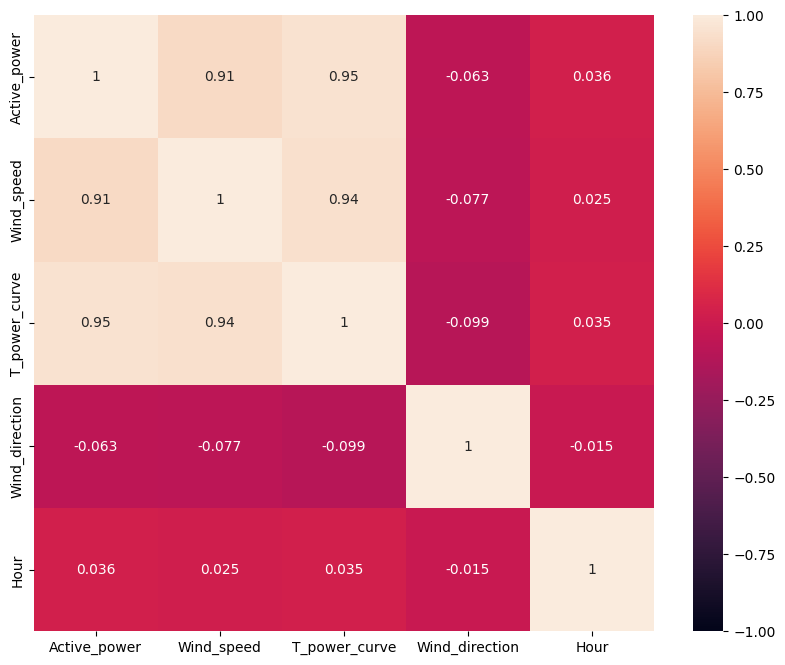

,Active_power,Wind_speed,T_power_curve,Wind_direction,Hour
Active_power,1.000000,0.912774,0.949918,-0.062702,0.036355
Wind_speed,0.912774,1.000000,0.944209,-0.077188,0.024754
T_power_curve,0.949918,0.944209,1.000000,-0.099076,0.034636
Wind_direction,-0.062702,-0.077188,-0.099076,1.000000,-0.015355
Hour,0.036355,0.024754,0.034636,-0.015355,1.000000


In [ ]:
corr = df.corr(numeric_only = True)

plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
plt.show()

corr

there is a strong positive correlation between wind speed and active power, as you think

**The question: in which directions the wind turbines generate the maximum power?**

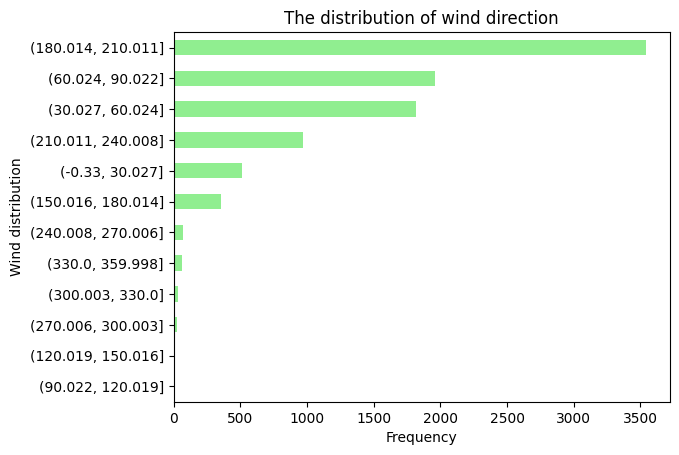

In [ ]:
#extracting the maximum active power rows from our dataset

filtered_rows = df[(df['Active_power'] > 3000)]

#extracting the wind direction from filtered rows

bin_wind_direction = pd.cut(filtered_rows['Wind_direction'], 12)

bin_wind_direction.value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'lightgreen')
plt.title('The distribution of wind direction')
plt.xlabel('Frequency')
plt.ylabel('Wind distribution')
plt.show()


So, we can say that the maximum power is generated between 180 and 210 degrees

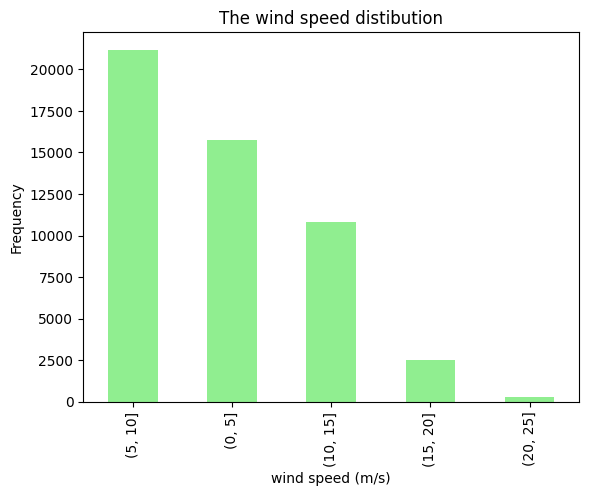

In [ ]:
df['Wind_speed_bins'].value_counts().plot(kind ='bar', color = 'lightgreen')
plt.title('The wind speed distibution')
plt.xlabel('wind speed (m/s)')
plt.ylabel('Frequency')
plt.show()

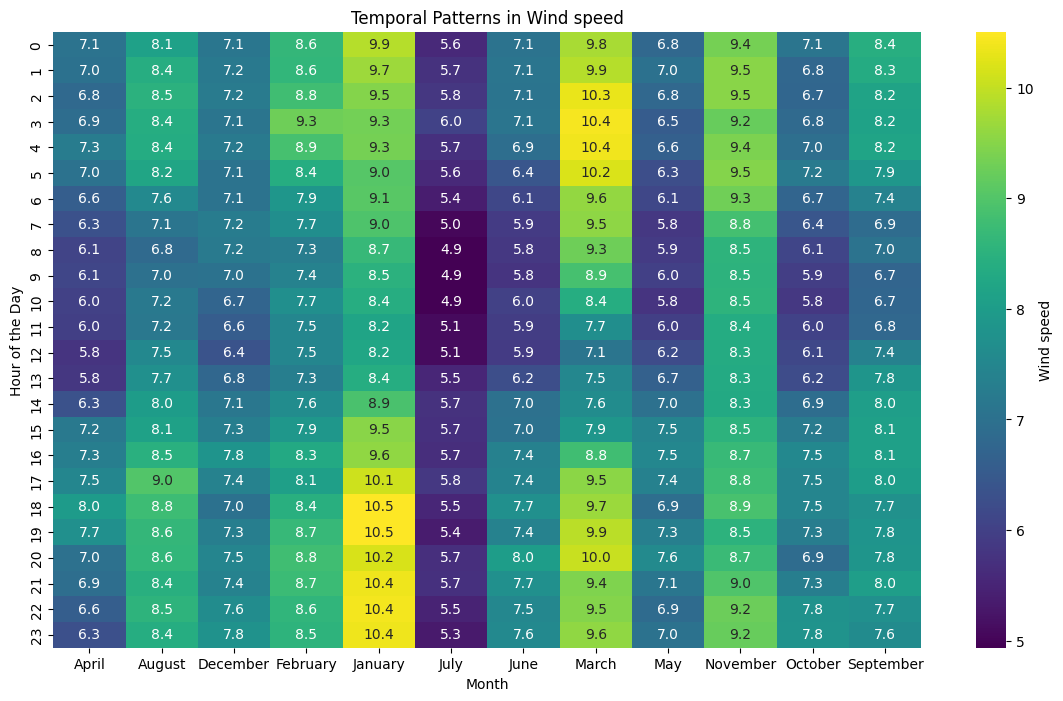

In [ ]:
plt.figure(figsize=(14, 8))
heatmap_data = df.pivot_table(index='Hour', columns='Month', values='Wind_speed', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Wind speed'})

plt.title('Temporal Patterns in Wind speed')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.show()


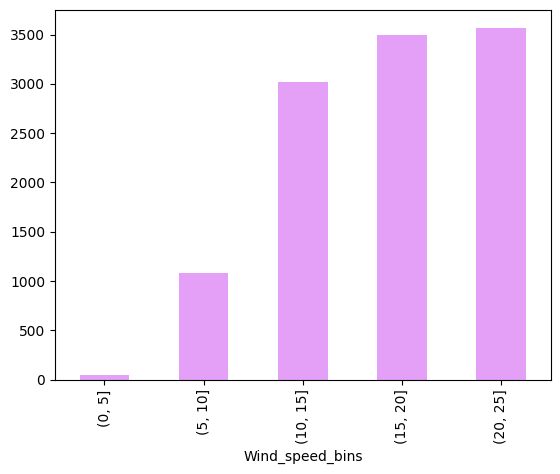

In [ ]:
bins = [0,5,10,15,20,25]

df['Wind_speed_bins'] = pd.cut(df['Wind_speed'], bins = bins)

avg_power_by_speed = df.groupby(df['Wind_speed_bins'])['Active_power'].mean()

avg_power_by_speed.plot(kind = 'bar', color = ['#E4A0F7'])
plt.show()

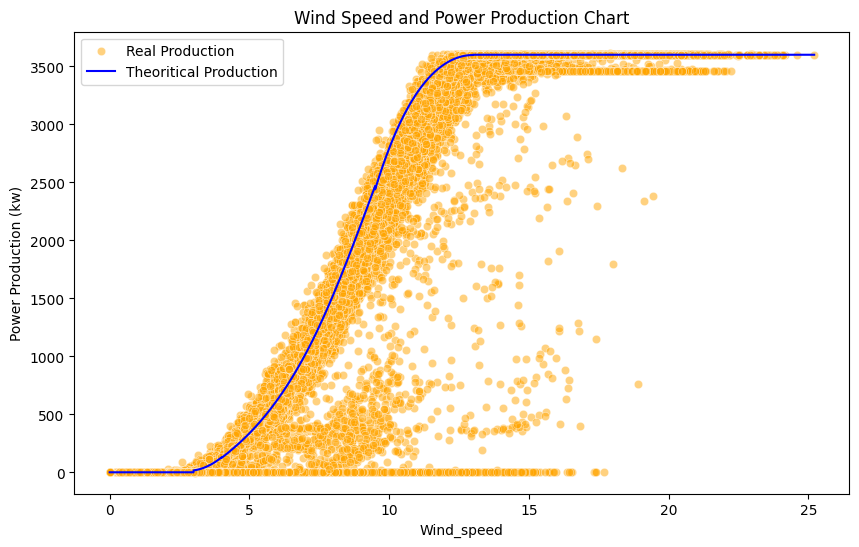

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='Wind_speed', y='Active_power', color='orange', label='Real Production', alpha=0.5, data=df)
sns.lineplot(x='Wind_speed', y='T_power_curve', color='blue', label='Theoritical Production', data=df)

plt.title('Wind Speed and Power Production Chart')
plt.ylabel('Power Production (kw)');

From the graph above, we can see the theoritical power production curve generally fits well with the real production.

we can say that the power production reaches a maximum level and continues in a straight line if the wind speed reaches to 13m/s.


Also, we can see that there are some 0 power production, even if it's speed is higher than 5m/s. I want to investigate this.


       Wind_speed  T_power_curve  Active_power
1630     1.669722            0.0           0.0
3752     2.878107            0.0           0.0
12981    0.603402            0.0           0.0
28919    2.748732            0.0           0.0
27380    2.815715            0.0           0.0


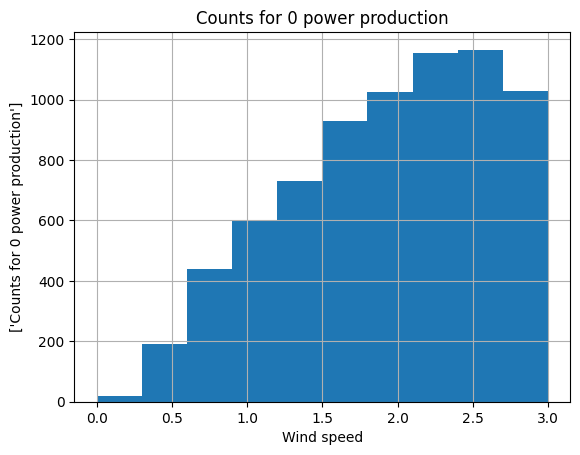

In [ ]:
zero_power = df[(df['Active_power']== 0) &  (df['T_power_curve'] ==0)]

print(zero_power[['Wind_speed', 'T_power_curve', 'Active_power']].sample(5))

zero_power['Wind_speed'].hist()
plt.title('Counts for 0 power production')
plt.xlabel('Wind speed')
plt.ylabel(['Counts for 0 power production'])
plt.show()


we can see from the above, limit for the theoretical power curve is 3 m/s. If the wind speed below 3m/s, we shouldn't expect any power production.

BUt, there are some observations for 0 power production, even if the wind speeds are above 3m/s.

**Qustion: Why there aren't any power production in some observations while the wind speed is higher than 3m/s?**

In [ ]:
zero_power_3m = df[(df['Active_power'] == 0) & (df['T_power_curve'] != 0) &
 (df['Wind_speed'] > 3)]

zero_power_3m.value_counts().sum()

3497

There are 3497 observations where therotically there should be power production. From the dataset we cannot see the reason, it might be cause by maintenance.

But let's see if we can see any information from the wind speed direction and month?

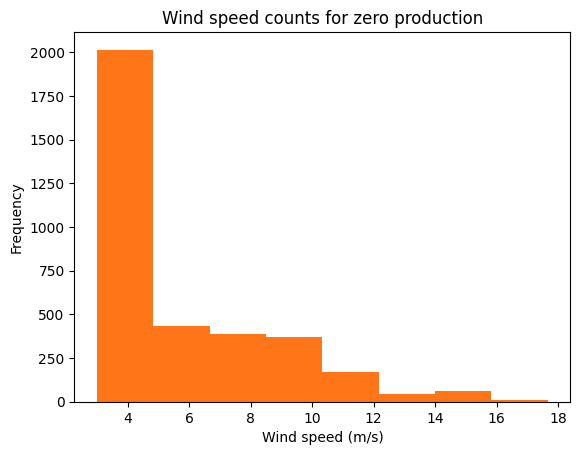

In [ ]:
zero_power_3m['Wind_speed'].plot.hist(bins = 8, color = ['#ff7518'])
plt.title('Wind speed counts for zero production')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


it seems like that the threshold wind speed for theoritical power is 4m/s, but there are other wind speed, which are above 4m/s.

Let's see monthly distribution

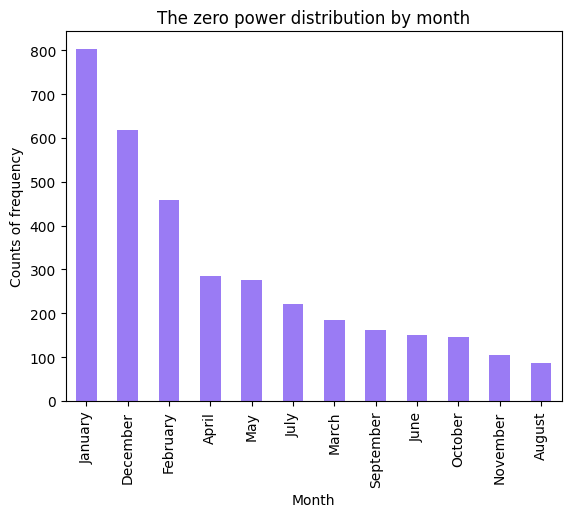

In [ ]:
zero_power_3m['Month'].value_counts().plot(kind = 'bar', color = ['#9A7Bf4'])
plt.title('The zero power distribution by month')
plt.xlabel('Month')
plt.ylabel('Counts of frequency')
plt.show()


it is usually in december and January when the wind turbine doesn't produce production.

Because I cannot decide if there zero power productions are caused by maintenance periods or something else, I am going to accept those 3497 observations as outliers and remove from the dataset.

In [ ]:
df_new = df[~((df['Active_power'] == 0)
                      & (df['T_power_curve'] != 0)
                      & (df['Wind_speed'] > 3))]

**THE FINAL CONCLUSION**


1. The average power production is notably higher in the months of August, March, and November.

2. Between 16:00 and 4:00, the wind turbines generate the higher production

3. The power production is higher when the wind blows from the directions between 000-090 and 180-225 degrees. To be more specific, The wind production generates the maximum power between 180 and 210 degrees.

4. Wind turbines generate no power below 3 m/s wind speed.

   And, wind turbines reach maximum power production in a straight line when wind speed exceeds 13 m/s.